In [1]:
from tasks_python_files.Task4_Reviews_dataset_common_methods import get_neg_cue_scope_named_ent, get_neg_scope_reviews_named_ent, create_dataframe_neg_cues_scope, create_df_senti_neg_count, correlation_between_variables, plot_two_columns, get_sents, get_neg_cue_scope_modified, create_dataframe_neg_cues_scope_modified, get_neg_scope_reviews, get_negex_reviews

C:\Users\vanda\anaconda3\envs\p3_6\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import spacy
from spacy import displacy

import networkx as nx
import numpy as np

from textblob import TextBlob

In [3]:
#Initially reviews dataset was in tsv format
#df_mov_review = pd.read_csv('C:/Users/vanda/My Drive/Univ Of Oulu/Advanced_Practical_Training/Project/datasets/restuarants_review/Restaurant_Reviews.tsv', delimiter = '\t',quoting = 3)
#df_mov_review.to_csv("Restaurant_Reviews.csv")

In [4]:
df = pd.read_csv("Restaurant_Reviews.csv")

In [5]:
df = df.drop('Unnamed: 0', axis='columns')
df = df.rename(columns = {'Review':'reviews.text', 'Liked': 'reviews.rating'})

In [6]:
df.columns

Index(['reviews.text', 'reviews.rating'], dtype='object')

In [7]:
#remove nan from reviews.text and reviews.ratings columns (removing from only these columns as these columns are of interest for the analysis)
#df[df["reviews.text"].isna()]
df = df.dropna(subset = ['reviews.text','reviews.rating'])
df = df.reset_index()
df = df.drop('index', axis='columns')
#df = df.rename(columns = {'index':'previous_index'})

In [8]:
df_5 = df.head(5)

###### 1000 reviews, renoved if any nan values in ratings or review text
###### 0: negative review & 1: positive review

In [9]:
#df[df['reviews.rating']==1]

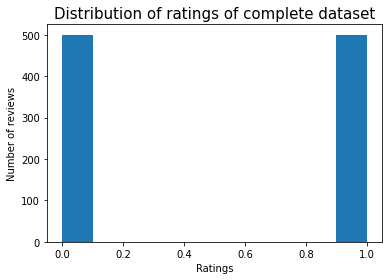

In [10]:
#distribution of ratings of all reviews
plt.hist(df['reviews.rating'])
plt.xlabel('Ratings',fontsize=10)
plt.ylabel('Number of reviews',fontsize=10)
plt.title('Distribution of ratings of complete dataset', fontsize=15)
plt.savefig("./results_pics/"+"df_restaurant_distribution_of_ratings.png", dpi=500)

###### number of positive and negative review is almost same

In [11]:
neg_count_list, neg_scopes_list = get_neg_scope_reviews(df_5['reviews.text'])
####ne_negated_list, negex_neg_review_count = get_negex_reviews(df_5['reviews.text'])

In [12]:
#negex_neg_review_count: for percentage of reviews negated
#ne_negated_list: for wordcloud, only the negated named entities need to show in cloud


In [13]:
neg_count_list

[0, 1, 1, 0, 0]

Correlation and p-value of sentiment and ratings of reviews: 

(0.5900592383683329, 7.649459112227146e-95)


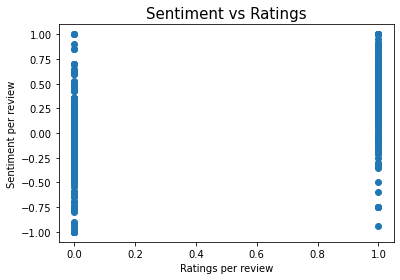

Correlation and p-value of sentiment and negation count of review: 

(-0.2688767491656286, 5.0689169390730855e-18)


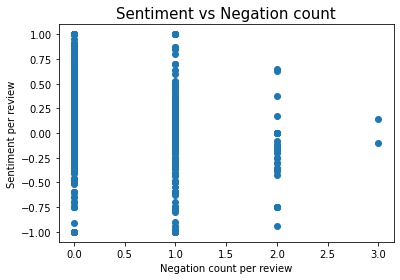

In [14]:
#complete dataset sentiment vs ratings and sentiment vs negation count of each review

output_path = 'C:\\Users\\vanda\\My Drive\\Univ Of Oulu\\Advanced_Practical_Training\\Project\\results_review\\df_restuarant_negs_new.xls'
neg_count_lt, negex_count_list = get_neg_scope_reviews_named_ent(df['reviews.rating'], df['reviews.text'], output_path)
df_negs, avg_senti_reviews_lt = create_dataframe_neg_cues_scope(df)

df_senti_negs = create_df_senti_neg_count(df, neg_count_lt, avg_senti_reviews_lt)

print("Correlation and p-value of sentiment and ratings of reviews: \n")
print(correlation_between_variables(df_senti_negs['sentiment_score'], df_senti_negs['reviews.rating']))

plot_two_columns(df_senti_negs['reviews.rating'], df_senti_negs['sentiment_score'], "Ratings per review", "Sentiment per review", "Sentiment vs Ratings", "restuarant_corr_senti_vs_rating_df.png")

print("Correlation and p-value of sentiment and negation count of review: \n")
print(correlation_between_variables(df_senti_negs['sentiment_score'], df_senti_negs['negations_count']))

plot_two_columns(df_senti_negs['negations_count'], df_senti_negs['sentiment_score'], "Negation count per review", "Sentiment per review", "Sentiment vs Negation count", "restuarant_corr_senti_neg_count_df.png")

In [15]:
print(neg_count_lt.count(3))
print(sum(neg_count_lt))

2
330


In [16]:
sum(df_senti_negs["negations_count"])

330

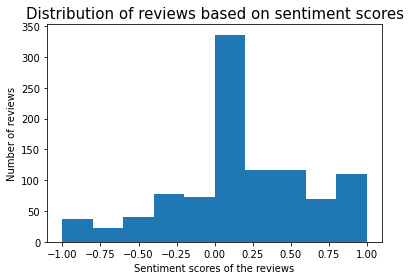

In [17]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

df['polarity_score']=df['reviews.text'].\
   apply(lambda x : polarity(x))
#df['polarity_score'].hist()

plt.hist(df['polarity_score'])

plt.title('Distribution of reviews based on sentiment scores', fontsize=15)
plt.xlabel('Sentiment scores of the reviews',fontsize=10)
plt.ylabel('Number of reviews',fontsize=10)
plt.savefig("./results_pics/"+"restaurant_df_senti_dist.png", dpi=500)

In [18]:
conditions_df = [(df_senti_negs['sentiment_score']>0) & (df_senti_negs['reviews.rating']==0),
              (df_senti_negs['sentiment_score']==0) & (df_senti_negs['reviews.rating']==0),
              (df_senti_negs['sentiment_score']<0) & (df_senti_negs['reviews.rating']==0),
              (df_senti_negs['sentiment_score']>0) & (df_senti_negs['reviews.rating']==1),
              (df_senti_negs['sentiment_score']==0) & (df_senti_negs['reviews.rating']==1),
              (df_senti_negs['sentiment_score']<0) & (df_senti_negs['reviews.rating']==1)]

In [19]:
values = ['N1', 'N2', 'N3', 'P1', 'P2', 'P3']

In [20]:
df_senti_negs['senti_rating_condition'] = np.select(conditions_df, values)

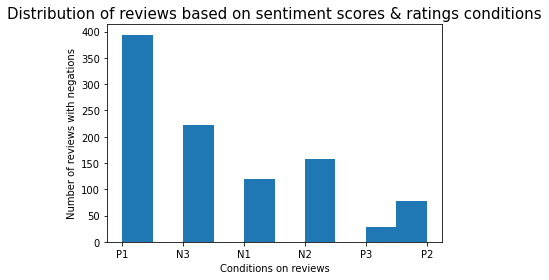

In [21]:
plt.hist(df_senti_negs['senti_rating_condition'])

plt.title('Distribution of reviews based on sentiment scores & ratings conditions', fontsize=15)
plt.xlabel('Conditions on reviews',fontsize=10)
plt.ylabel('Number of reviews with negations',fontsize=10)
plt.savefig("./results_pics/"+"restaurant_df_dist_conditions.png", dpi=500)

In [22]:
#sentiment_score: sentiment calculated based on whole review
#average_sentiment_score: average sentiment of sentiment scores of all sentences of the review
df_senti_negs

,reviews.text,reviews.rating,sentiment_score,negations_count,average_sentiment_score,senti_rating_condition
0,Wow... Loved this place.,1,0.400000,0,0.400000,P1
1,Crust is not good.,0,-0.350000,1,-0.350000,N3
2,Not tasty and the texture was just nasty.,0,-1.000000,1,-1.000000,N3
3,Stopped by during the late May bank holiday of...,1,0.200000,0,0.200000,P1
4,The selection on the menu was great and so wer...,1,0.800000,0,0.800000,P1
...,...,...,...,...,...,...
995,I think food should have flavor and texture an...,0,0.000000,0,0.000000,N2
996,Appetite instantly gone.,0,0.000000,0,0.000000,N2
997,Overall I was not impressed and would not go b...,0,-0.166667,2,-0.166667,N3
998,"The whole experience was underwhelming, and I ...",0,0.100000,0,0.100000,N1


In [23]:
#sentiment_score: sentiment score of each sentence of the review
df_negs

,reviews,sentences_in_review,sentiment_score,named_entities,negation_cues,negation_scopes,POS_negation_scope,negex_named_entities,negex_ne_output
0,Wow... Loved this place.,Wow... Loved this place.,0.400000,[],[],[],[],[],[]
1,Crust is not good.,Crust is not good.,-0.350000,[Crust (ORG)],[not],[Crust is good],[[good->ADJ]],[Crust],[False]
2,Not tasty and the texture was just nasty.,Not tasty and the texture was just nasty.,-1.000000,[],[not],[tasty and the texture was just nasty],"[[tasty->ADJ, texture->NOUN, was->VERB, nasty-...",[],[]
3,Stopped by during the late May bank holiday of...,Stopped by during the late May bank holiday of...,0.200000,"[the late May bank (DATE), Rick Steve (PERSON)]",[],[],[],"[the late May bank, Rick Steve]","[False, False]"
4,The selection on the menu was great and so wer...,The selection on the menu was great and so wer...,0.800000,[],[],[],[],[],[]
...,...,...,...,...,...,...,...,...,...
995,I think food should have flavor and texture an...,I think food should have flavor and texture an...,0.000000,[],[],[],[],[],[]
996,Appetite instantly gone.,Appetite instantly gone.,0.000000,[],[],[],[],[],[]
997,Overall I was not impressed and would not go b...,Overall I was not impressed and would not go b...,-0.166667,[],"[not, not]",[Overall I was impressed and would not go back...,"[[impressed->ADJ, go->VERB], [go->VERB]]",[],[]
998,"The whole experience was underwhelming, and I ...","The whole experience was underwhelming, and I ...",0.100000,[Ninja Sushi (PERSON)],[],[],[],[Ninja Sushi],[False]


In [24]:
# nlp = spacy.load("en_core_web_sm")
# doc = nlp("Kind of hard to mess up a steak but they did.")

# for sent in doc.sents:
#     print(sent)

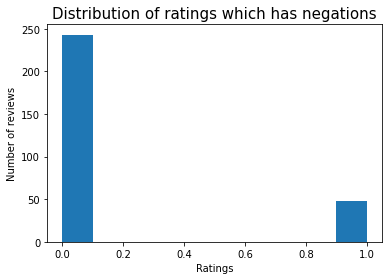

In [25]:
#Consider reviews from df_senti_negs which consist of negation
df_ratings_negs = df_senti_negs[df_senti_negs['negations_count']>0]


plt.hist(df_ratings_negs['reviews.rating'])
plt.title('Distribution of ratings which has negations', fontsize=15)
plt.xlabel('Ratings',fontsize=10)
plt.ylabel('Number of reviews',fontsize=10)
plt.savefig("C:\\Users\\vanda\\My Drive\\Univ Of Oulu\\Advanced_Practical_Training\\Project\\final_notebooks_project\\results_pics\\"+"restaurant_df_dist_negs.png", dpi=500)

Correlation and p-value of sentiment and ratings of reviews: 

(0.2493500697401897, 1.681565517379356e-05)


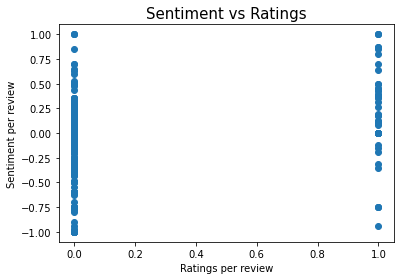

In [26]:
print("Correlation and p-value of sentiment and ratings of reviews: \n")
print(correlation_between_variables(df_ratings_negs['sentiment_score'], df_ratings_negs['reviews.rating']))

plot_two_columns(df_ratings_negs['reviews.rating'], df_ratings_negs['sentiment_score'], "Ratings per review", "Sentiment per review", "Sentiment vs Ratings", "restaurant_corr_senti_vs_rating_negations.png")

In [27]:
len(df_ratings_negs)

291

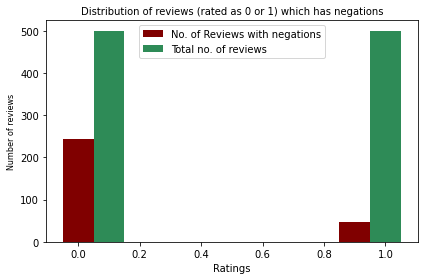

In [46]:

#import seaborn
#seaborn.set(style='ticks')

np.random.seed(0)

fig, ax = plt.subplots()

a_heights, a_bins = np.histogram(df_ratings_negs['reviews.rating'])
b_heights, b_bins = np.histogram(df['reviews.rating'], bins=a_bins)

#print(a_heights, a_bins)

width = (a_bins[1] - a_bins[0])

ax.bar(a_bins[:-1], a_heights, width=width, facecolor='maroon')
ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen')

plt.title('Distribution of reviews (rated as 0 or 1) which has negations', fontsize=10)
plt.xlabel('Ratings',fontsize=10)
plt.ylabel('Number of reviews',fontsize=8)
plt.legend(['No. of Reviews with negations', 'Total no. of reviews'], loc='upper center')
plt.tight_layout()
plt.savefig("./results_pics/"+"restaurant_df_dist_negs_n_all.png", dpi=300)

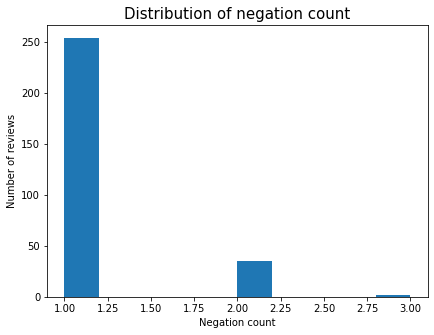

In [29]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(df_ratings_negs['negations_count'])
plt.title('Distribution of negation count', fontsize=15)
plt.xlabel('Negation count',fontsize=10)
plt.ylabel('Number of reviews',fontsize=10)
plt.savefig("./results_pics/"+"restaurant_df_dist_negs.png", dpi=500)


Correlation and p-value of sentiment and negation count of review: 

(-0.13476757707682882, 0.021472704383841627)


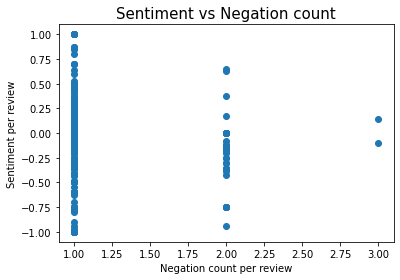

In [30]:
print("Correlation and p-value of sentiment and negation count of review: \n")
print(correlation_between_variables(df_ratings_negs['sentiment_score'], df_ratings_negs['negations_count']))

plot_two_columns(df_ratings_negs['negations_count'], df_ratings_negs['sentiment_score'], "Negation count per review", "Sentiment per review", "Sentiment vs Negation count", "restuarant_corr_senti_neg_count_df_negations.png")

In [31]:
#https://ieeexplore-ieee-org.pc124152.oulu.fi:9443/document/7811108

N1: sentiment_score>0 & reviews.rating==0

N2: sentiment_score<0 & 'reviews.rating==0

N3: sentiment_score==0 & reviews.rating==0

P1: sentiment_score>0 & reviews.rating==1

P2: sentiment_score<0 & reviews.rating==1

P3: sentiment_score==0 & reviews.rating==1

In [32]:
conditions = [(df_ratings_negs['sentiment_score']>0) & (df_ratings_negs['reviews.rating']==0),
              (df_ratings_negs['sentiment_score']==0) & (df_ratings_negs['reviews.rating']==0),
              (df_ratings_negs['sentiment_score']<0) & (df_ratings_negs['reviews.rating']==0),
              (df_ratings_negs['sentiment_score']>0) & (df_ratings_negs['reviews.rating']==1),
              (df_ratings_negs['sentiment_score']==0) & (df_ratings_negs['reviews.rating']==1),
              (df_ratings_negs['sentiment_score']<0) & (df_ratings_negs['reviews.rating']==1)]

In [33]:
values = ['N1', 'N2', 'N3', 'P1', 'P2', 'P3']

In [34]:
df_ratings_negs['senti_rating_condition'] = np.select(conditions, values)

C:\Users\vanda\anaconda3\envs\p3_6\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


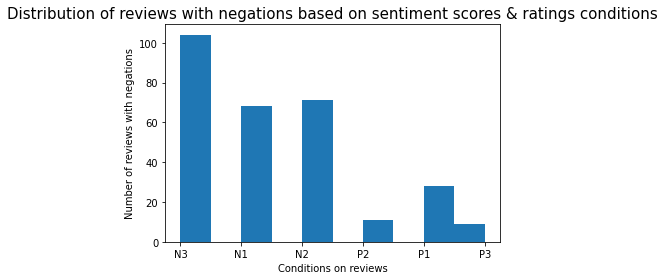

In [35]:
plt.hist(df_ratings_negs['senti_rating_condition'])

plt.title('Distribution of reviews with negations based on sentiment scores & ratings conditions', fontsize=15)
plt.xlabel('Conditions on reviews',fontsize=10)
plt.ylabel('Number of reviews with negations',fontsize=10)
plt.savefig("./results_pics/"+"restaurant_df_dist_negs_conditions.png", dpi=500)

In [36]:
df_ratings_negs

,reviews.text,reviews.rating,sentiment_score,negations_count,average_sentiment_score,senti_rating_condition
1,Crust is not good.,0,-0.350000,1,-0.350000,N3
2,Not tasty and the texture was just nasty.,0,-1.000000,1,-1.000000,N3
6,Honeslty it didn't taste THAT fresh.),0,0.300000,1,0.300000,N1
11,Would not go back.,0,0.000000,1,0.000000,N2
12,The cashier had no care what so ever on what I...,0,0.000000,1,0.000000,N2
...,...,...,...,...,...,...
985,The problem I have is that they charge $11.99 ...,0,0.275000,1,0.275000,N1
988,It really is impressive that the place hasn't ...,0,0.248148,1,0.298148,N1
994,I can't tell you how disappointed I was.,0,-0.750000,2,-0.750000,N3
997,Overall I was not impressed and would not go b...,0,-0.166667,2,-0.166667,N3


In [37]:
N1_negs_reviews_list = df_ratings_negs['reviews.text'][(df_ratings_negs['sentiment_score']>0) & (df_ratings_negs['reviews.rating']==0)]
N2_negs_reviews_list = df_ratings_negs['reviews.text'][(df_ratings_negs['sentiment_score']==0) & (df_ratings_negs['reviews.rating']==0)]
N3_negs_reviews_list = df_ratings_negs['reviews.text'][(df_ratings_negs['sentiment_score']<0) & (df_ratings_negs['reviews.rating']==0)]

In [38]:
N1_reviews_list = df_senti_negs['reviews.text'][(df_senti_negs['sentiment_score']>0) & (df_senti_negs['reviews.rating']==0) & (df_senti_negs['negations_count']==0)]
N2_reviews_list = df_senti_negs['reviews.text'][(df_senti_negs['sentiment_score']==0) & (df_senti_negs['reviews.rating']==0) & (df_senti_negs['negations_count']==0)]
N3_reviews_list = df_senti_negs['reviews.text'][(df_senti_negs['sentiment_score']<0) & (df_senti_negs['reviews.rating']==0) & (df_senti_negs['negations_count']==0)]

In [39]:
P1_reviews_list = df_senti_negs['reviews.text'][(df_senti_negs['sentiment_score']>0) & (df_senti_negs['reviews.rating']==1) & (df_senti_negs['negations_count']==0)]
P2_reviews_list = df_senti_negs['reviews.text'][(df_senti_negs['sentiment_score']==0) & (df_senti_negs['reviews.rating']==1) & (df_senti_negs['negations_count']==0)]
P3_reviews_list = df_senti_negs['reviews.text'][(df_senti_negs['sentiment_score']<0) & (df_senti_negs['reviews.rating']==1) & (df_senti_negs['negations_count']==0)]

In [40]:
P1_negs_reviews_list = df_ratings_negs['reviews.text'][(df_ratings_negs['sentiment_score']>0) & (df_ratings_negs['reviews.rating']==1)]
P2_negs_reviews_list = df_ratings_negs['reviews.text'][(df_ratings_negs['sentiment_score']==0) & (df_ratings_negs['reviews.rating']==1)]
P3_negs_reviews_list = df_ratings_negs['reviews.text'][(df_ratings_negs['sentiment_score']<0) & (df_ratings_negs['reviews.rating']==1)]

In [41]:
#len(P3_reviews_list)

In [42]:
len(df_senti_negs[df_senti_negs["negations_count"]==1])

254

In [43]:
len(df_senti_negs)

1000

In [44]:
ne_negated_list, negex_neg_review_count = get_negex_reviews(df['reviews.text'])